In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
data=pd.read_csv(r"C:\Users\JEEVAN\Downloads\student23.csv")
data.head()

,Student Id,Gender,Age,Motivation,Attendance_Rate,Mark
0,30051076,Male,25,50,80,50.5
1,30067059,Male,25,41,56,24.5
2,30067059,Male,30,78,89,61.0
3,30071826,Male,25,53,76,51.5
4,30078801,Female,21,86,88,70.0


### By using the student_id,Gender,Age,Motivation,Attendance_rate we must predict the Marks of the student

In [3]:
data.isnull().sum()

Student Id         0
Gender             0
Age                0
Motivation         0
Attendance_Rate    0
Mark               0
dtype: int64

<AxesSubplot:>

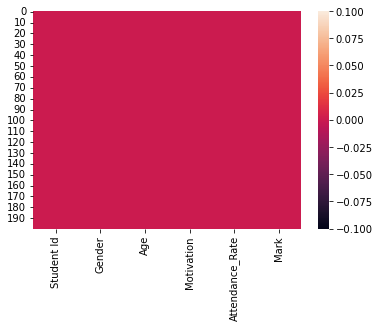

In [4]:
sns.heatmap(data.isnull())

In [5]:
data.columns

Index(['Student Id', 'Gender', 'Age', 'Motivation', 'Attendance_Rate', 'Mark'], dtype='object')

In [6]:
x=data.iloc[:,[2,3,4]]       # only predictors
y=data.iloc[:,5]             # only target variable

In [7]:
x

,Age,Motivation,Attendance_Rate
0,25,50,80
1,25,41,56
2,30,78,89
3,25,53,76
4,21,86,88
...,...,...,...
195,30,52,80
196,26,94,100
197,25,85,91
198,26,87,90


In [8]:
y

0      50.5
1      24.5
2      61.0
3      51.5
4      70.0
       ... 
195    51.0
196    82.5
197    75.5
198    71.5
199    73.5
Name: Mark, Length: 200, dtype: float64

# Lets start with Gradient Boosting with 2 estimators1

## Lets build 2 estimators

### let us now use GradientBoostingRegressor with 2 estimators to train the model and to predict the age for the same inputs

In [12]:
from sklearn.ensemble import GradientBoostingRegressor

GB=GradientBoostingRegressor(n_estimators=2)

In [14]:
GB.fit(x,y)
y_predict=GB.predict(x)
y_predict

array([58.57523286, 52.81242333, 61.44920438, 58.06237571, 63.20500111,
       63.20500111, 63.20500111, 65.34688167, 52.81242333, 65.34688167,
       57.63962968, 63.20500111, 61.44920438, 60.10790818, 63.20500111,
       61.44920438, 65.34688167, 63.20500111, 63.20500111, 60.10790818,
       60.77785589, 65.34688167, 61.44920438, 65.34688167, 56.05509   ,
       60.10790818, 58.06237571, 57.63962968, 60.10790818, 61.44920438,
       58.06237571, 57.63962968, 63.20500111, 61.44920438, 63.20500111,
       63.20500111, 52.81242333, 57.63962968, 61.44920438, 63.20500111,
       61.44920438, 57.63962968, 56.05509   , 65.34688167, 57.63962968,
       57.63962968, 63.20500111, 57.63962968, 57.63962968, 63.20500111,
       61.44920438, 52.81242333, 65.34688167, 60.10790818, 52.81242333,
       63.20500111, 61.44920438, 63.20500111, 65.34688167, 60.77785589,
       57.63962968, 61.44920438, 60.10790818, 58.57523286, 60.10790818,
       60.77785589, 60.10790818, 61.44920438, 63.20500111, 65.34

# MSE of Residuals

In [17]:
MSE_2=(sum((y-y_predict)**2))/len(y)
print('MSE for 2 estimators : ',MSE_2)

MSE for 2 estimators :  221.26473562442985


In [18]:
# without doing anything our mse values is 221
# we have to build multiple model with lesser than 221 mse

## GradientBoostingRegressor Model with number of estimators 3

In [20]:
from sklearn.ensemble import GradientBoostingRegressor

GB3=GradientBoostingRegressor(n_estimators=3)

In [21]:
GB3.fit(x,y)

GradientBoostingRegressor(n_estimators=3)

In [22]:
y_predict3=GB3.predict(x)
y_predict3

array([57.461681  , 49.45451433, 61.72055586, 56.94882386, 63.47635259,
       64.2641248 , 64.2641248 , 67.33261017, 49.45451433, 67.33261017,
       56.52607783, 64.2641248 , 61.72055586, 59.79529918, 64.2641248 ,
       61.72055586, 67.33261017, 64.2641248 , 64.2641248 , 59.79529918,
       61.04920737, 67.33261017, 61.72055586, 67.33261017, 54.079581  ,
       59.79529918, 56.94882386, 56.52607783, 59.79529918, 61.72055586,
       56.94882386, 56.52607783, 64.2641248 , 61.72055586, 64.2641248 ,
       64.2641248 , 49.45451433, 56.52607783, 61.72055586, 64.2641248 ,
       61.72055586, 56.52607783, 54.079581  , 67.33261017, 56.52607783,
       56.52607783, 64.2641248 , 56.52607783, 56.52607783, 64.2641248 ,
       61.72055586, 49.45451433, 67.33261017, 59.79529918, 49.45451433,
       64.2641248 , 61.72055586, 64.2641248 , 67.33261017, 61.04920737,
       56.52607783, 61.72055586, 59.79529918, 57.461681  , 59.79529918,
       61.04920737, 59.79529918, 61.72055586, 64.2641248 , 67.33

In [23]:
MSE_3=(sum((y-y_predict3)**2))//len(y)
print('MSE of three estimators :',MSE_3)

MSE of three estimators : 183.0


# Let's check with the 50th estimators

In [25]:
from sklearn.ensemble import GradientBoostingRegressor
GB_50=GradientBoostingRegressor(n_estimators=50)
GB_50.fit(x,y)

GradientBoostingRegressor(n_estimators=50)

In [26]:
y_predict50=GB_50.predict(x)
y_predict50

array([48.72909151, 24.03204851, 65.37921316, 48.05065771, 70.76833426,
       76.8061968 , 73.71476405, 83.98205929, 15.39414814, 80.86801546,
       45.72186141, 77.32085868, 63.27115477, 57.88808065, 73.1811369 ,
       63.16867723, 83.98205929, 73.71476405, 71.11184836, 57.99055819,
       63.17137557, 84.77126989, 65.22316727, 86.86244487, 37.82034553,
       56.8147649 , 48.00348223, 43.59820073, 58.40351254, 64.47327796,
       48.31923439, 45.39465661, 76.92662457, 65.3174053 , 73.6774376 ,
       73.81724159, 21.11686353, 45.707355  , 63.36539281, 73.81003462,
       63.26291527, 42.16584014, 36.84017034, 84.87431336, 46.34674309,
       44.80516179, 73.68821213, 45.00522103, 43.65195137, 73.90397668,
       65.22316727,  8.31387116, 84.36331342, 56.90559479, 10.18083243,
       73.91251216, 65.4734512 , 73.69577594, 87.47673134, 62.16596796,
       45.48512151, 65.22316727, 56.80311725, 50.9307305 , 56.05515418,
       62.16596796, 57.99055819, 64.0486232 , 73.31300217, 83.87

In [27]:
MSE_50=sum((y-y_predict50)**2)/len(y)
print('MSE of 50 estimators :',MSE_50)

MSE of 50 estimators : 9.468199279207536


# Grid Search

In [29]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
model=GradientBoostingRegressor()

In [34]:
params={'n_estimators':range(1,200)}
grid=GridSearchCV(estimator=model,cv=3,param_grid=params,scoring='neg_mean_squared_error')
grid.fit(x,y)

NameError: name 'gird' is not defined

In [35]:
print('The best estimator returned by GridSearch CV is =',grid.best_estimator_)

The best estimator returned by GridSearch CV is = GradientBoostingRegressor(n_estimators=30)


# Best Model

In [36]:
GB=grid.best_estimator_
GB.fit(x,y)
y_predict=GB.predict(x)
y_predict

array([49.11584374, 26.88496478, 65.08172503, 48.33031899, 70.56589853,
       76.38031236, 73.26837967, 83.63473389, 18.7572668 , 80.41723029,
       46.14201642, 76.79159519, 63.03966873, 57.94151207, 72.85709684,
       63.03966873, 83.63473389, 73.26837967, 70.81436023, 57.94151207,
       62.94812903, 83.94044581, 65.08172503, 83.94044581, 36.08831833,
       57.03984447, 48.33031899, 44.00747893, 57.94151207, 64.14755388,
       48.33031899, 45.61134773, 76.79159519, 65.08172503, 73.26837967,
       73.26837967, 22.45351465, 46.14201642, 63.03966873, 73.26837967,
       63.03966873, 42.96704383, 36.58037885, 85.15824674, 46.14201642,
       46.14201642, 73.26837967, 46.58280376, 44.26591222, 73.38248641,
       65.08172503, 12.34543923, 83.63473389, 57.03984447, 12.9886907 ,
       73.26837967, 65.08172503, 72.85709684, 85.15824674, 61.84024388,
       46.14201642, 65.08172503, 57.03984447, 50.82670176, 56.2918814 ,
       61.84024388, 57.94151207, 63.91961469, 72.85709684, 83.63

In [39]:
GB

GradientBoostingRegressor(n_estimators=30)

In [37]:
MSE_best=(sum((y-y_predict)**2))/len(y)
print('MSE for best estimators :',MSE_best)

MSE for best estimators : 14.622150972223338
